<a href="https://colab.research.google.com/github/Pamz911/Machine-learning-Analysis-on-Drinking/blob/main/MLprojectdrink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
# Filter out FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/smoking_driking_dataset_excel.xlsx")

In [ ]:
df  #display all rows

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [ ]:
# Display the first five rows
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

In [ ]:
# Convert height in cm to m
new_height = df['height']/100
new_height

0         1.70
1         1.80
2         1.65
3         1.75
4         1.65
          ... 
991341    1.75
991342    1.70
991343    1.55
991344    1.75
991345    1.60
Name: height, Length: 991346, dtype: float64

In [ ]:
# Calculate new column - bmi
bmi = df["weight"]/new_height
bmi

0         44.117647
1         44.444444
2         45.454545
3         45.714286
4         36.363636
            ...    
991341    45.714286
991342    44.117647
991343    32.258065
991344    34.285714
991345    43.750000
Length: 991346, dtype: float64

In [ ]:
# Add bmi column to the data frame
df.loc[:, "bmi"] = bmi
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,92,17.1,1,1.0,21,35,40,1,Y,44.117647
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,121,15.8,1,0.9,20,36,27,3,N,44.444444
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,104,15.8,1,0.9,47,32,68,1,N,45.454545
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,106,17.6,1,1.1,29,34,18,1,N,45.714286
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,104,13.8,1,0.8,19,12,25,1,N,36.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,132,15.0,1,1.0,26,36,27,1,N,45.714286
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,45,15.8,1,1.1,14,17,15,1,N,44.117647
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,157,14.3,1,0.8,30,27,17,3,Y,32.258065
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,53,14.5,1,0.8,21,14,17,1,N,34.285714


In [ ]:
df2 = df.drop(columns= 'height', axis=1) #drop the 'height' column
df2

,sex,age,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,Male,35,75,90.0,1.0,1.0,1,1,120,80,...,92,17.1,1,1.0,21,35,40,1,Y,44.117647
1,Male,30,80,89.0,0.9,1.2,1,1,130,82,...,121,15.8,1,0.9,20,36,27,3,N,44.444444
2,Male,40,75,91.0,1.2,1.5,1,1,120,70,...,104,15.8,1,0.9,47,32,68,1,N,45.454545
3,Male,50,80,91.0,1.5,1.2,1,1,145,87,...,106,17.6,1,1.1,29,34,18,1,N,45.714286
4,Male,50,60,80.0,1.0,1.2,1,1,138,82,...,104,13.8,1,0.8,19,12,25,1,N,36.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,80,92.1,1.5,1.5,1,1,114,80,...,132,15.0,1,1.0,26,36,27,1,N,45.714286
991342,Male,35,75,86.0,1.0,1.5,1,1,119,83,...,45,15.8,1,1.1,14,17,15,1,N,44.117647
991343,Female,40,50,68.0,1.0,0.7,1,1,110,70,...,157,14.3,1,0.8,30,27,17,3,Y,32.258065
991344,Male,25,60,72.0,1.5,1.0,1,1,119,74,...,53,14.5,1,0.8,21,14,17,1,N,34.285714


In [ ]:
  #drop the weight columndf3 = df2.drop(columns= 'weight', axis=1)
df3

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,Male,35,90.0,1.0,1.0,1,1,120,80,99,...,92,17.1,1,1.0,21,35,40,1,Y,44.117647
1,Male,30,89.0,0.9,1.2,1,1,130,82,106,...,121,15.8,1,0.9,20,36,27,3,N,44.444444
2,Male,40,91.0,1.2,1.5,1,1,120,70,98,...,104,15.8,1,0.9,47,32,68,1,N,45.454545
3,Male,50,91.0,1.5,1.2,1,1,145,87,95,...,106,17.6,1,1.1,29,34,18,1,N,45.714286
4,Male,50,80.0,1.0,1.2,1,1,138,82,101,...,104,13.8,1,0.8,19,12,25,1,N,36.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,92.1,1.5,1.5,1,1,114,80,88,...,132,15.0,1,1.0,26,36,27,1,N,45.714286
991342,Male,35,86.0,1.0,1.5,1,1,119,83,83,...,45,15.8,1,1.1,14,17,15,1,N,44.117647
991343,Female,40,68.0,1.0,0.7,1,1,110,70,90,...,157,14.3,1,0.8,30,27,17,3,Y,32.258065
991344,Male,25,72.0,1.5,1.0,1,1,119,74,69,...,53,14.5,1,0.8,21,14,17,1,N,34.285714


In [ ]:
df3["sex"]= df3["sex"].replace({"Female": 0, "Male": 1})
df3["DRK_YN"]= df3["DRK_YN"].replace({"N": 0, "Y": 1})
df3

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,1,35,90.0,1.0,1.0,1,1,120,80,99,...,92,17.1,1,1.0,21,35,40,1,1,44.117647
1,1,30,89.0,0.9,1.2,1,1,130,82,106,...,121,15.8,1,0.9,20,36,27,3,0,44.444444
2,1,40,91.0,1.2,1.5,1,1,120,70,98,...,104,15.8,1,0.9,47,32,68,1,0,45.454545
3,1,50,91.0,1.5,1.2,1,1,145,87,95,...,106,17.6,1,1.1,29,34,18,1,0,45.714286
4,1,50,80.0,1.0,1.2,1,1,138,82,101,...,104,13.8,1,0.8,19,12,25,1,0,36.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,92.1,1.5,1.5,1,1,114,80,88,...,132,15.0,1,1.0,26,36,27,1,0,45.714286
991342,1,35,86.0,1.0,1.5,1,1,119,83,83,...,45,15.8,1,1.1,14,17,15,1,0,44.117647
991343,0,40,68.0,1.0,0.7,1,1,110,70,90,...,157,14.3,1,0.8,30,27,17,3,1,32.258065
991344,1,25,72.0,1.5,1.0,1,1,119,74,69,...,53,14.5,1,0.8,21,14,17,1,0,34.285714


In [ ]:
#Clean missing values
print("These are the missing values for each attribute.")
display(df3.isna().sum())

These are the missing values for each attribute.


sex                 0
age                 0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
bmi                 0
dtype: int64

In [ ]:
# Check for duplicate values
print("This is the total number of duplicated row in the dataset")
display(sum(df3.duplicated()))

This is the total number of duplicated row in the dataset


26

In [ ]:
df4 = df3.drop_duplicates()
#Check if there are still duplicates
print("Be sure there are no duplicated rows")
df4.shape

Be sure there are no duplicated rows


(991320, 23)

In [ ]:
#No null values, Duplicates have been removed, all features are in numerical form.

In [ ]:
df4.head()

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,1,35,90.0,1.0,1.0,1,1,120,80,99,...,92,17.1,1,1.0,21,35,40,1,1,44.117647
1,1,30,89.0,0.9,1.2,1,1,130,82,106,...,121,15.8,1,0.9,20,36,27,3,0,44.444444
2,1,40,91.0,1.2,1.5,1,1,120,70,98,...,104,15.8,1,0.9,47,32,68,1,0,45.454545
3,1,50,91.0,1.5,1.2,1,1,145,87,95,...,106,17.6,1,1.1,29,34,18,1,0,45.714286
4,1,50,80.0,1.0,1.2,1,1,138,82,101,...,104,13.8,1,0.8,19,12,25,1,0,36.363636


In [ ]:
df4.describe().transpose()  #Perform Exploratory Data Analysis(EDA)

,count,mean,std,min,25%,50%,75%,max
sex,991320.0,0.531008,0.499038,0.000000,0.000,1.000000,1.000000,1.0
age,991320.0,47.614529,14.181346,20.000000,35.000,45.000000,60.000000,85.0
waistline,991320.0,81.233255,11.850296,8.000000,74.100,81.000000,87.800000,999.0
sight_left,991320.0,0.980833,0.605954,0.100000,0.700,1.000000,1.200000,9.9
sight_right,991320.0,0.978428,0.604779,0.100000,0.700,1.000000,1.200000,9.9
hear_left,991320.0,1.031495,0.174652,1.000000,1.000,1.000000,1.000000,2.0
hear_right,991320.0,1.030476,0.171892,1.000000,1.000,1.000000,1.000000,2.0
SBP,991320.0,122.432360,14.543083,67.000000,112.000,120.000000,131.000000,273.0
DBP,991320.0,76.052549,9.889334,32.000000,70.000,76.000000,82.000000,185.0
BLDS,991320.0,100.424305,24.179852,25.000000,88.000,96.000000,105.000000,852.0


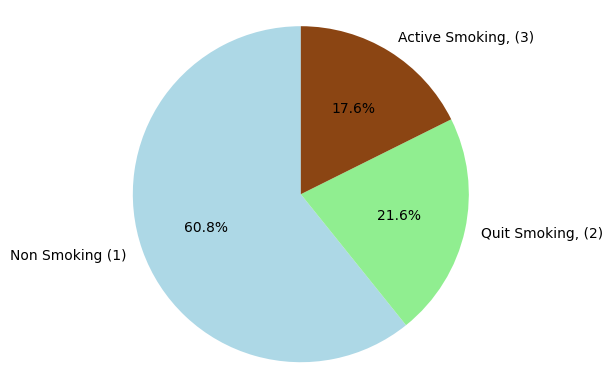

In [ ]:
# Check percentage of each class(target) in the smoking category
smoking_totals = df4['SMK_stat_type_cd'].value_counts()
# Labels for the pie chart
labels = ['Non Smoking (1)', 'Quit Smoking, (2)', 'Active Smoking, (3)']
# Colors for each category
colors = ['lightblue', 'lightgreen','saddlebrown']
# Creating the pie chart
plt.pie(smoking_totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

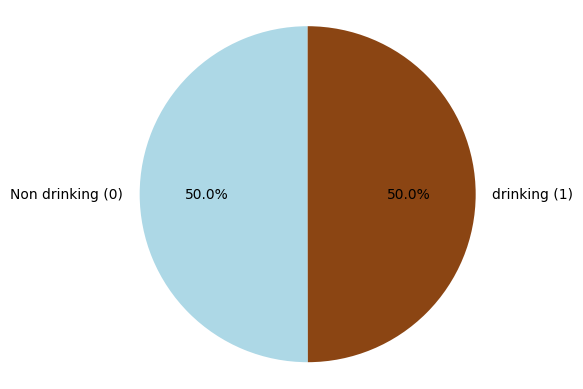

In [ ]:
# Check percentage of each class in the drinking category
drinking_totals = df4['DRK_YN'].value_counts()
# Labels for the pie chart
labels = ['Non drinking (0)', 'drinking (1)']
# Colors for each category
colors = ['lightblue','saddlebrown']
# Creating the pie chart
plt.pie(drinking_totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

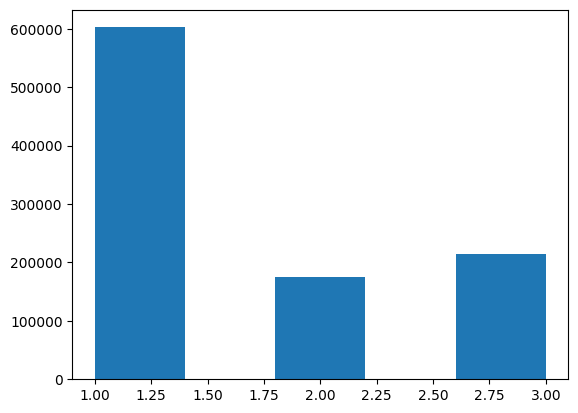

In [ ]:
#plot a histogram to show distribution of smoking population
plt.hist(df4['SMK_stat_type_cd'],bins=5)
plt.show()


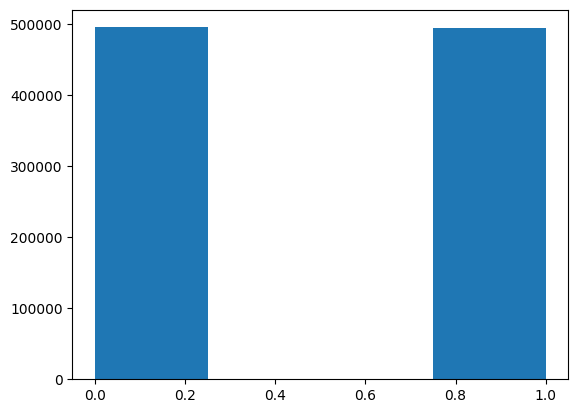

In [ ]:
#plot a histogram to show distribution of drinking population
plt.hist(df4['DRK_YN'],bins = 4)
plt.show()

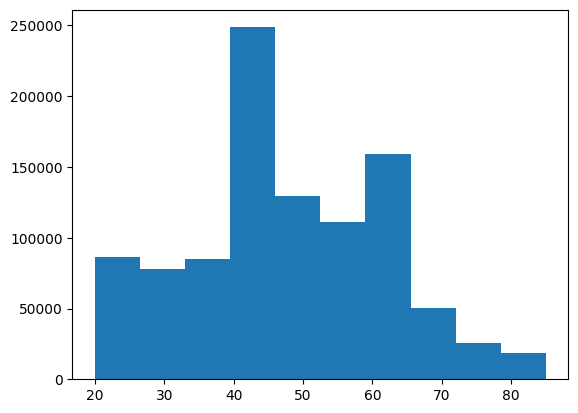

In [ ]:
#use histogram to show the age distribution of dataset
plt.hist(df['age'],bins=10)
plt.show()

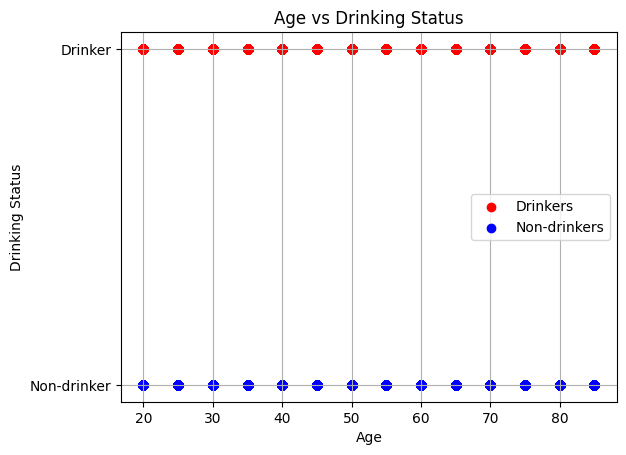

In [ ]:
#plot a scatter plot to show the age distribution of those that drink
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
ages = df4['age']
drinking_status = df4['DRK_YN']

# Separate ages of drinkers and non-drinkers
drinker_ages = [age for age, drinking in zip(ages, drinking_status) if drinking]
non_drinker_ages = [age for age, drinking in zip(ages, drinking_status) if not drinking]

# Create scatter plot
plt.scatter(drinker_ages, [1] * len(drinker_ages), color='red', label='Drinkers')
plt.scatter(non_drinker_ages, [0] * len(non_drinker_ages), color='blue', label='Non-drinkers')

# Customize plot
plt.xlabel('Age')
plt.ylabel('Drinking Status')
plt.yticks([0, 1], ['Non-drinker', 'Drinker'])
plt.title('Age vs Drinking Status')
plt.legend()

# Display plot
plt.grid(True)
plt.show()


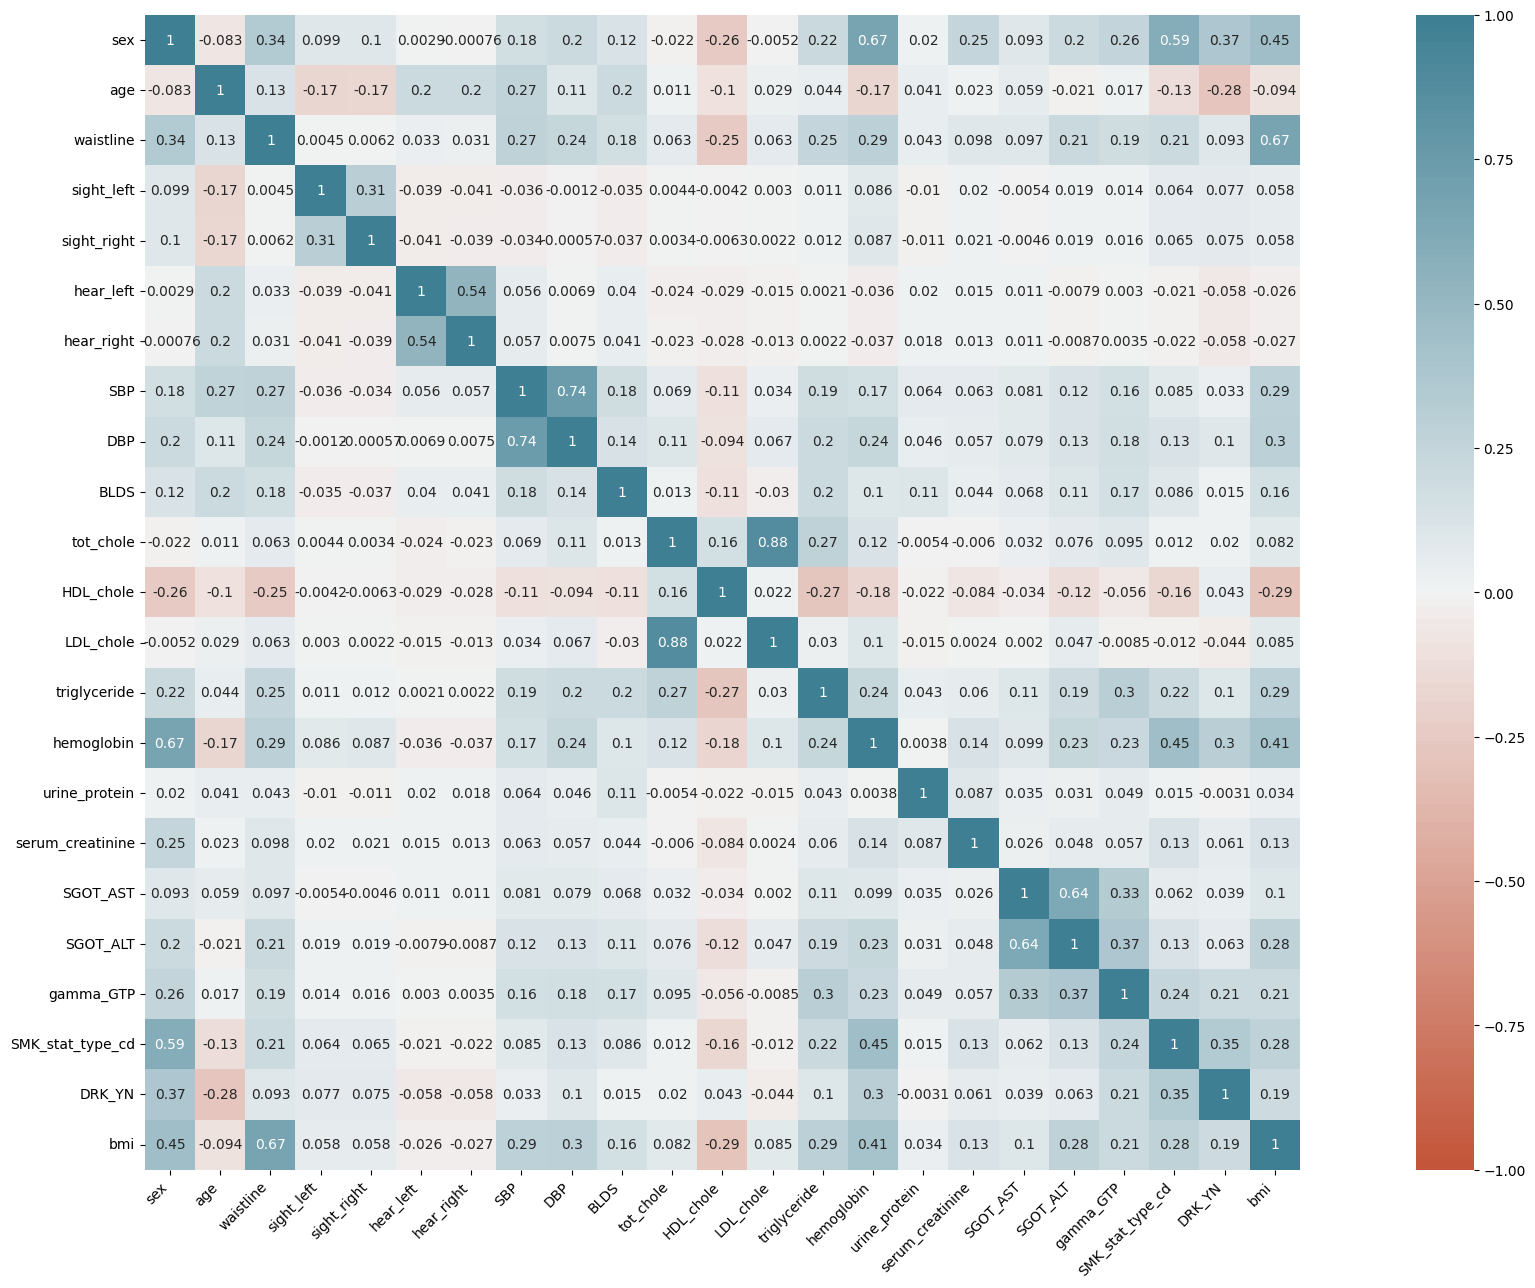

In [ ]:
corr = df4.corr()
plt.figure(figsize=(30, 15))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Highest 3 Correlations based on the heatmap are:
1) tot_chole vs LDL_chol
2)Systolic blood pressure(SBP) vs Diastolic blood pressure(DBP)
3) waist_line vs bmi


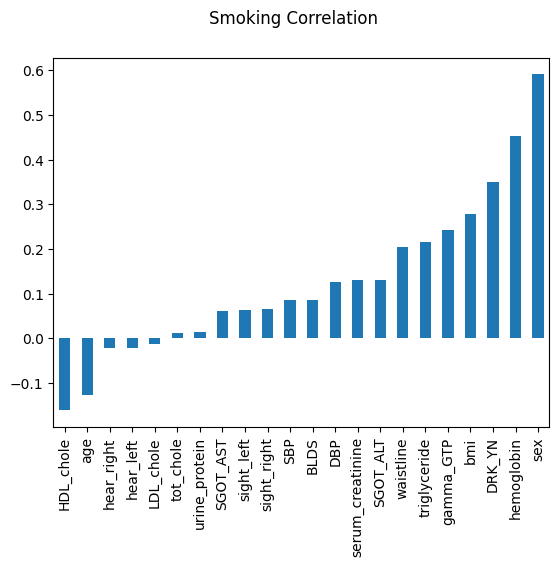

In [ ]:
plt.suptitle('Smoking Correlation')
df4.corr()['SMK_stat_type_cd'].sort_values().drop('SMK_stat_type_cd').plot(kind='bar');

Highest correlation with 'smoking'(body signals) are :  
sex,
hemoglobin,
bmi.

Lowest negative correlation with smoking(body signals) are:
HDL_chol,
hear_right,
hear_left.


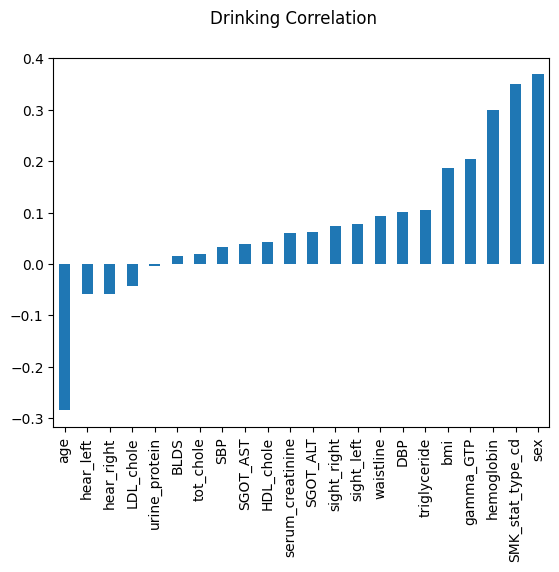

In [ ]:
plt.suptitle('Drinking Correlation')
df4.corr()['DRK_YN'].sort_values().drop('DRK_YN').plot(kind='bar');

Highest positive correlation for drinking(Body signals):
sex,
hemoglobin,
Gamma_GTP


Lowest negative correlation for drinking(Body signals):
age,
hear_left,
hear_right.

In [ ]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,991320.0,0.531008,0.499038,0.000000,0.000,1.000000,1.000000,1.0
age,991320.0,47.614529,14.181346,20.000000,35.000,45.000000,60.000000,85.0
waistline,991320.0,81.233255,11.850296,8.000000,74.100,81.000000,87.800000,999.0
sight_left,991320.0,0.980833,0.605954,0.100000,0.700,1.000000,1.200000,9.9
sight_right,991320.0,0.978428,0.604779,0.100000,0.700,1.000000,1.200000,9.9
hear_left,991320.0,1.031495,0.174652,1.000000,1.000,1.000000,1.000000,2.0
hear_right,991320.0,1.030476,0.171892,1.000000,1.000,1.000000,1.000000,2.0
SBP,991320.0,122.432360,14.543083,67.000000,112.000,120.000000,131.000000,273.0
DBP,991320.0,76.052549,9.889334,32.000000,70.000,76.000000,82.000000,185.0
BLDS,991320.0,100.424305,24.179852,25.000000,88.000,96.000000,105.000000,852.0


*FEATURES FOR EXPLORATION: **
Triglycerides, serum_creatinine, tot_chole, HDL_chole, LDL_chol, Gamma_GTP, SGOT_AST and SGOT_ALT have maximum values that are extremely far from the mean values.

In [ ]:
total_pd2.reset_index(drop=True, inplace=True)

# List of features to plot
features_to_plot_1 = ['triglyceride','serum_creatinine','gamma_GTP','tot_chole']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features_to_plot_1):
    sns.boxplot(y=df4[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

# List of features to plot
features_to_plot_2 = ['HDL_chole', 'LDL_chole', 'SGOT_ALT', 'SGOT_AST']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features_to_plot_2):
    sns.boxplot(y=df4[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


NameError: name 'total_pd2' is not defined

In [ ]:
df4

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,1,35,90.0,1.0,1.0,1,1,120,80,99,...,92,17.1,1,1.0,21,35,40,1,1,44.117647
1,1,30,89.0,0.9,1.2,1,1,130,82,106,...,121,15.8,1,0.9,20,36,27,3,0,44.444444
2,1,40,91.0,1.2,1.5,1,1,120,70,98,...,104,15.8,1,0.9,47,32,68,1,0,45.454545
3,1,50,91.0,1.5,1.2,1,1,145,87,95,...,106,17.6,1,1.1,29,34,18,1,0,45.714286
4,1,50,80.0,1.0,1.2,1,1,138,82,101,...,104,13.8,1,0.8,19,12,25,1,0,36.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,92.1,1.5,1.5,1,1,114,80,88,...,132,15.0,1,1.0,26,36,27,1,0,45.714286
991342,1,35,86.0,1.0,1.5,1,1,119,83,83,...,45,15.8,1,1.1,14,17,15,1,0,44.117647
991343,0,40,68.0,1.0,0.7,1,1,110,70,90,...,157,14.3,1,0.8,30,27,17,3,1,32.258065
991344,1,25,72.0,1.5,1.0,1,1,119,74,69,...,53,14.5,1,0.8,21,14,17,1,0,34.285714


In [ ]:
df_encoded = pd.get_dummies(df4)  #apply one-hot encoding

print("Original DataFrame:")
print(df4)
print("\nDataFrame after one-hot encoding:")
print(df_encoded)

Original DataFrame:
        sex  age  waistline  sight_left  sight_right  hear_left  hear_right  \
0         1   35       90.0         1.0          1.0          1           1   
1         1   30       89.0         0.9          1.2          1           1   
2         1   40       91.0         1.2          1.5          1           1   
3         1   50       91.0         1.5          1.2          1           1   
4         1   50       80.0         1.0          1.2          1           1   
...     ...  ...        ...         ...          ...        ...         ...   
991341    1   45       92.1         1.5          1.5          1           1   
991342    1   35       86.0         1.0          1.5          1           1   
991343    0   40       68.0         1.0          0.7          1           1   
991344    1   25       72.0         1.5          1.0          1           1   
991345    1   50       90.5         1.0          1.5          1           1   

        SBP  DBP  BLDS  ...  tr

In [ ]:
#MODELLING

In [ ]:
#import Sci-kit learn model tools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [ ]:
df_encoded.columns   #encoded columns for ML

Index(['sex', 'age', 'waistline', 'sight_left', 'sight_right', 'hear_left',
       'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd', 'DRK_YN', 'bmi'],
      dtype='object')

In [ ]:
X = df_encoded.drop(['SMK_stat_type_cd','DRK_YN'], axis=1)  #drop target vectors
y = df_encoded["DRK_YN"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42) #SPLIT DATASET FOR TRAINING & TESTING(80-20)% RESPECTIVELY
print(X_train)
print(y_train)

        sex  age  waistline  sight_left  sight_right  hear_left  hear_right  \
807199    1   35       73.0         1.0          1.5          1           1   
426234    0   25       63.5         1.5          1.5          1           1   
808466    1   40       82.0         1.0          1.0          1           1   
350577    0   30       77.0         1.5          1.5          1           1   
171239    0   45       72.0         1.2          1.0          1           1   
...     ...  ...        ...         ...          ...        ...         ...   
259181    0   40       79.0         1.0          1.2          1           1   
365845    1   45       81.0         1.0          1.5          1           1   
131932    1   50       87.0         0.7          0.7          1           1   
671171    0   45       75.1         0.2          0.9          1           1   
121958    1   45       86.0         1.5          1.5          1           1   

        SBP  DBP  BLDS  ...  HDL_chole  LDL_chole  

In [ ]:
pipe = make_pipeline(StandardScaler())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))
print('Accuracy Score', accuracy_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     99512
           1       0.72      0.74      0.73     98752

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264

Accuracy Score 0.7291641447766615


In [ ]:
metrics = confusion_matrix(y_test, rf.predict(X_test))

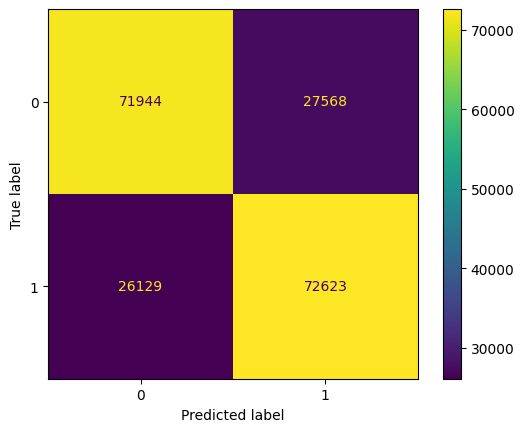

In [ ]:
metrics_display = ConfusionMatrixDisplay(confusion_matrix=metrics, display_labels=[0,1])
metrics_display.plot()
plt.show()

In [ ]:
#Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

NameError: name 'pd' is not defined

In [ ]:
!pip install lime
import lime

In [ ]:
from lime import lime_tabular

In [ ]:
y_test.unique()

array([1, 0])

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
feature_names=X_train.columns.values.tolist(),
class_names= ['Not Drinker','Drinker'], verbose=True, mode='classification')

In [ ]:
rf.predict(X_test)[158610] #drinker = 1, Not drinker = 0

0

In [ ]:
rf.predict_proba(X_test)[158610]  #Predict probabilities of each class

array([0.95, 0.05])

In [ ]:
j = 144
exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=len(X_test.values[144]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.5009896214553389
Prediction_local [0.47161685]
Right: 0.35


In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((793056, 21), (198264, 21), (793056,), (198264,))

In [ ]:
#initialize and train logistic regression
lrm = LogisticRegression(max_iter=1000, fit_intercept=False)
lrm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, max_iter=1000)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data
y_pred_lrm = pipe.predict(X_test)
accuracy_lrm = accuracy_score(y_test,y_pred_lrm)
print('Logistic Regression Accuracy', accuracy_lrm)
print('Classification report', classification_report(y_test,y_pred_lrm))
print('ROC_AUC_SCORE', roc_auc_score(y_test,y_pred_lrm))

Logistic Regression Accuracy 0.7214320300205787
Classification report               precision    recall  f1-score   support

           0       0.72      0.72      0.72     99051
           1       0.72      0.72      0.72     99213

    accuracy                           0.72    198264
   macro avg       0.72      0.72      0.72    198264
weighted avg       0.72      0.72      0.72    198264

ROC_AUC_SCORE 0.7214327259820458


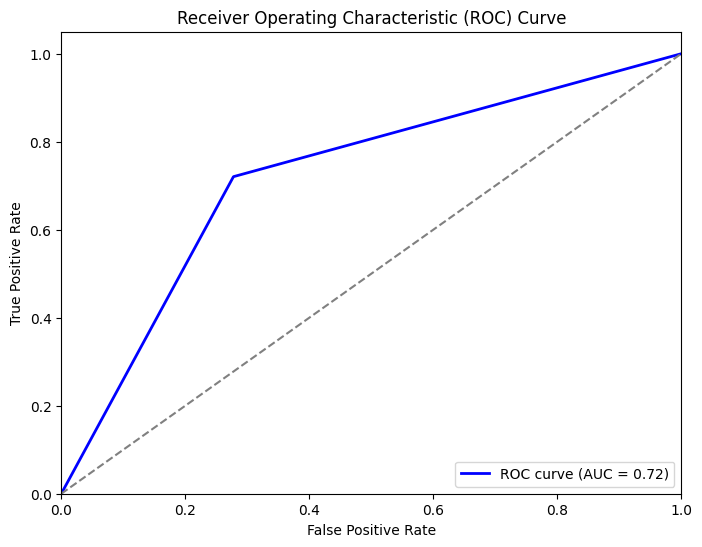

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrm)

auc = roc_auc_score(y_test, y_pred_lrm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pipe2 = make_pipeline(StandardScaler(), LinearSVC())
pipe2.fit(X_train, y_train)  # apply scaling on training data


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [ ]:
pipe2.score(X_test, y_test)  # apply scaling on testing data, without leaking training data
y_pred_svm = pipe2.predict(X_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy', accuracy_svm)
print('Classification report', classification_report(y_test,y_pred_svm))
print('ROC_AUC_SCORE', roc_auc_score(y_test,y_pred_svm))


Accuracy 0.7214320300205787
Classification report               precision    recall  f1-score   support

           0       0.72      0.72      0.72     99512
           1       0.72      0.72      0.72     98752

    accuracy                           0.72    198264
   macro avg       0.72      0.72      0.72    198264
weighted avg       0.72      0.72      0.72    198264

ROC_AUC_SCORE 0.7214444096556067


In [ ]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier
svm = SVC()

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf'
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best parameters found:")
print(grid_search.best_params_)

# Evaluate the model on the test set with the best hyperparameters
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)
print("Test set accuracy with best hyperparameters:", test_accuracy)